In [106]:
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense

url = 'E:/Meat_Excels/MeatCutPredictions.csv'

df = pd.read_csv(url, encoding='latin-1')

labels=df['Original_Labels_Color'].values

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Concatenate
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow.math import confusion_matrix
import time
import numpy as np
from sklearn.model_selection import train_test_split

In [108]:
labels

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

In [109]:
df.head

<bound method NDFrame.head of       Original_Labels_Color  Log_Reg Prediction  DTC Prediction  Weight  \
0                         0                   2               0    5.94   
1                         0                   2               2    6.20   
2                         0                   2               0    6.04   
3                         0                   4               4    6.48   
4                         0                   2               0    6.34   
...                     ...                 ...             ...     ...   
8063                      4                   2               2    5.30   
8064                      4                   4               2    5.08   
8065                      4                   4               4    7.52   
8066                      4                   4               2    7.34   
8067                      4                   4               4    7.24   

      Colour_Predition_1000  Colour_Predition_25  Colour_Predition_50

In [110]:
feature1 = df[["Weight","BW_Predition_1000","Log_Reg Prediction","DTC Prediction"]]

In [111]:
feature1.dtypes

Weight                float64
BW_Predition_1000       int64
Log_Reg Prediction      int64
DTC Prediction          int64
dtype: object

In [112]:
import numpy as np
from sklearn.model_selection import train_test_split

X=feature1

y=np.ravel(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)

In [113]:
print(X_train)
print(X_test)

print(y_train)
print(y_test)


      Weight  BW_Predition_1000  Log_Reg Prediction  DTC Prediction
6258    5.82                  4                   4               4
6116    6.18                  4                   4               0
7657    9.18                  4                   4               4
3043    5.90                  2                   2               2
1435    5.20                  2                   2               2
...      ...                ...                 ...             ...
4298    0.86                  3                   3               3
2980    6.06                  2                   2               4
5543    6.56                  4                   2               4
5618    5.34                  4                   4               2
2879    6.30                  2                   4               4

[6454 rows x 4 columns]
      Weight  BW_Predition_1000  Log_Reg Prediction  DTC Prediction
797     6.96                  0                   4               4
3982    1.56           

In [114]:
from sklearn.datasets import make_blobs
from numpy import where
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
#opt = SGD(lr=0.01, momentum=0.9)
#opt=RMSprop()
#opt = tf.keras.optimizers.SGD(learning_rate=0.1)
opt=Adam()
model = Sequential()

model.add(Dense(6, activation='relu', input_shape=(4,)))

model.add(Dense(6, activation='relu'))

model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#es = EarlyStopping(monitor=['val_loss','accuracy'], mode=['min'], verbose=1, patience=200)
#mc = ModelCheckpoint('best_model_color_ensemble.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
import time
start = time.perf_counter()                  
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=None, verbose=1)
elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)
#plot_model(model, to_file='ensemble.png')

Epoch 1/100
162/162 [==============================] - 0s 2ms/step - loss: 1.9266 - accuracy: 0.3318 - val_loss: 1.3089 - val_accuracy: 0.6406
Epoch 2/100
162/162 [==============================] - 0s 794us/step - loss: 1.1227 - accuracy: 0.6457 - val_loss: 0.9196 - val_accuracy: 0.6553
Epoch 3/100
162/162 [==============================] - 0s 744us/step - loss: 0.8453 - accuracy: 0.6647 - val_loss: 0.7459 - val_accuracy: 0.6677
Epoch 4/100
162/162 [==============================] - 0s 734us/step - loss: 0.7396 - accuracy: 0.6756 - val_loss: 0.6740 - val_accuracy: 0.6886
Epoch 5/100
162/162 [==============================] - 0s 739us/step - loss: 0.6837 - accuracy: 0.6897 - val_loss: 0.6231 - val_accuracy: 0.7088
Epoch 6/100
162/162 [==============================] - 0s 751us/step - loss: 0.6359 - accuracy: 0.7099 - val_loss: 0.5776 - val_accuracy: 0.7382
Epoch 7/100
162/162 [==============================] - 0s 747us/step - loss: 0.5919 - accuracy: 0.7428 - val_loss: 0.5319 - val_accu

162/162 [==============================] - 0s 899us/step - loss: 0.2301 - accuracy: 0.9473 - val_loss: 0.2222 - val_accuracy: 0.9489
Epoch 58/100
162/162 [==============================] - 0s 1ms/step - loss: 0.2294 - accuracy: 0.9462 - val_loss: 0.2207 - val_accuracy: 0.9489
Epoch 59/100
162/162 [==============================] - 0s 954us/step - loss: 0.2269 - accuracy: 0.9471 - val_loss: 0.2184 - val_accuracy: 0.9489
Epoch 60/100
162/162 [==============================] - 0s 1ms/step - loss: 0.2256 - accuracy: 0.9473 - val_loss: 0.2169 - val_accuracy: 0.9497
Epoch 61/100
162/162 [==============================] - 0s 1ms/step - loss: 0.2241 - accuracy: 0.9475 - val_loss: 0.2161 - val_accuracy: 0.9489
Epoch 62/100
162/162 [==============================] - 0s 942us/step - loss: 0.2228 - accuracy: 0.9479 - val_loss: 0.2164 - val_accuracy: 0.9489
Epoch 63/100
162/162 [==============================] - 0s 871us/step - loss: 0.2213 - accuracy: 0.9479 - val_loss: 0.2118 - val_accuracy: 0.94

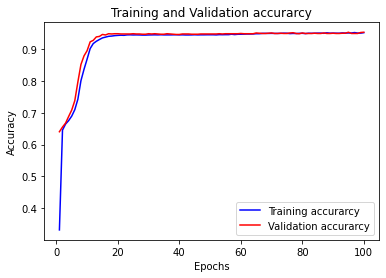

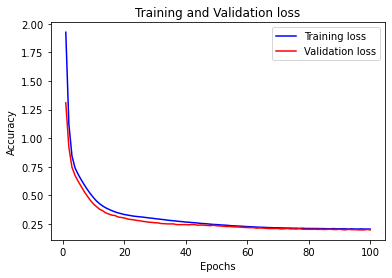

In [115]:
from matplotlib import pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [116]:
y_pred = model.predict_classes(X_test)

score,accuracy = model.evaluate(X_test, y_test,verbose=1)

print(score)
print(accuracy)

loss_metrics = model.evaluate(X_test, y_test,verbose=1)

print("Loss Metrics")
print(loss_metrics)

51/51 [==============================] - 0s 587us/step - loss: 0.1994 - accuracy: 0.9548
0.19939947128295898
0.9547707438468933
51/51 [==============================] - 0s 548us/step - loss: 0.1994 - accuracy: 0.9548
Loss Metrics
[0.19939947128295898, 0.9547707438468933]


In [117]:
y_score = model.predict(X_test)

In [118]:
y_score

array([[8.3784008e-01, 2.9286318e-02, 1.2785657e-01, 8.5623699e-18,
        5.0171022e-03, 3.8997555e-11],
       [2.5269657e-04, 1.8405826e-05, 1.4126186e-05, 9.9909079e-01,
        6.2297052e-04, 9.8295038e-07],
       [3.8068887e-02, 6.2157298e-03, 9.2917364e-03, 6.6594438e-08,
        9.4642353e-01, 3.1997259e-11],
       ...,
       [3.1214200e-02, 2.0565654e-03, 6.9098016e-03, 5.2045000e-04,
        9.5929897e-01, 1.7789739e-09],
       [4.1994094e-03, 6.9208099e-03, 1.3146686e-03, 1.5365697e-13,
        9.8756510e-01, 1.1616359e-15],
       [7.3518284e-04, 1.4655591e-02, 3.9963197e-04, 8.2248905e-22,
        9.8420954e-01, 4.5652526e-21]], dtype=float32)

In [119]:
from sklearn.metrics import classification_report, confusion_matrix
print('====Confusion Matrix=====')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('====Classification Report====')
print('\n')
print(classification_report(y_test,y_pred))

====Confusion Matrix=====


[[187   0  20   0   9]
 [  4   5   4   0   2]
 [ 13   0 402   0   4]
 [  0   0   0 409   0]
 [ 11   1   5   0 538]]


====Classification Report====


              precision    recall  f1-score   support

           0       0.87      0.87      0.87       216
           1       0.83      0.33      0.48        15
           2       0.93      0.96      0.95       419
           3       1.00      1.00      1.00       409
           4       0.97      0.97      0.97       555

    accuracy                           0.95      1614
   macro avg       0.92      0.83      0.85      1614
weighted avg       0.95      0.95      0.95      1614



In [120]:
y_pred = model.predict_classes(X_train)

In [121]:
from sklearn.metrics import classification_report, confusion_matrix
print('====Confusion Matrix=====')
print('\n')
print(confusion_matrix(y_train,y_pred))
print('\n')
print('====Classification Report====')
print('\n')
print(classification_report(y_train,y_pred))

====Confusion Matrix=====


[[ 712    1   78    0   53]
 [  10   32   24    0   17]
 [  62    0 1637    1   13]
 [   0    0    1 1675    0]
 [  19    5   25    1 2088]]


====Classification Report====


              precision    recall  f1-score   support

           0       0.89      0.84      0.86       844
           1       0.84      0.39      0.53        83
           2       0.93      0.96      0.94      1713
           3       1.00      1.00      1.00      1676
           4       0.96      0.98      0.97      2138

    accuracy                           0.95      6454
   macro avg       0.92      0.83      0.86      6454
weighted avg       0.95      0.95      0.95      6454



In [122]:
feature1 = df[["Weight","BW_Predition_150","Log_Reg Prediction","DTC Prediction"]]

In [123]:
X=feature1

#y=np.ravel(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)

In [124]:
model = Sequential()

model.add(Dense(6, activation='relu', input_shape=(4,)))

model.add(Dense(6, activation='relu'))

model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#es = EarlyStopping(monitor=['val_loss','accuracy'], mode=['min','max'], verbose=1, patience=200)
#mc = ModelCheckpoint('best_model_color_ensemble.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
import time
start = time.perf_counter()                  
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=None, verbose=1)
elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)
#plot_model(model, to_file='ensemble.png')

Epoch 1/100
162/162 [==============================] - 0s 3ms/step - loss: 1.5545 - accuracy: 0.4310 - val_loss: 0.8660 - val_accuracy: 0.6003
Epoch 2/100
162/162 [==============================] - 0s 905us/step - loss: 0.7354 - accuracy: 0.6576 - val_loss: 0.5721 - val_accuracy: 0.7637
Epoch 3/100
162/162 [==============================] - 0s 905us/step - loss: 0.5465 - accuracy: 0.8019 - val_loss: 0.4514 - val_accuracy: 0.8784
Epoch 4/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4476 - accuracy: 0.8859 - val_loss: 0.3802 - val_accuracy: 0.9210
Epoch 5/100
162/162 [==============================] - 0s 942us/step - loss: 0.3831 - accuracy: 0.9274 - val_loss: 0.3357 - val_accuracy: 0.9404
Epoch 6/100
162/162 [==============================] - 0s 893us/step - loss: 0.3380 - accuracy: 0.9372 - val_loss: 0.3034 - val_accuracy: 0.9419
Epoch 7/100
162/162 [==============================] - 0s 982us/step - loss: 0.3074 - accuracy: 0.9431 - val_loss: 0.2800 - val_accura

162/162 [==============================] - 0s 772us/step - loss: 0.2143 - accuracy: 0.9454 - val_loss: 0.2149 - val_accuracy: 0.9458
Epoch 58/100
162/162 [==============================] - 0s 715us/step - loss: 0.2144 - accuracy: 0.9456 - val_loss: 0.2144 - val_accuracy: 0.9450
Epoch 59/100
162/162 [==============================] - 0s 709us/step - loss: 0.2144 - accuracy: 0.9454 - val_loss: 0.2119 - val_accuracy: 0.9450
Epoch 60/100
162/162 [==============================] - 0s 704us/step - loss: 0.2141 - accuracy: 0.9454 - val_loss: 0.2120 - val_accuracy: 0.9450
Epoch 61/100
162/162 [==============================] - 0s 727us/step - loss: 0.2143 - accuracy: 0.9456 - val_loss: 0.2150 - val_accuracy: 0.9450
Epoch 62/100
162/162 [==============================] - 0s 856us/step - loss: 0.2133 - accuracy: 0.9456 - val_loss: 0.2186 - val_accuracy: 0.9450
Epoch 63/100
162/162 [==============================] - 0s 714us/step - loss: 0.2142 - accuracy: 0.9456 - val_loss: 0.2122 - val_accuracy

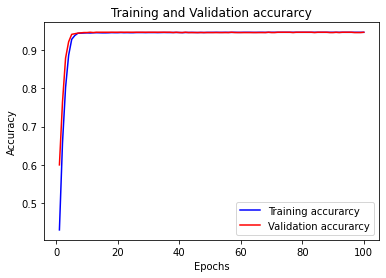

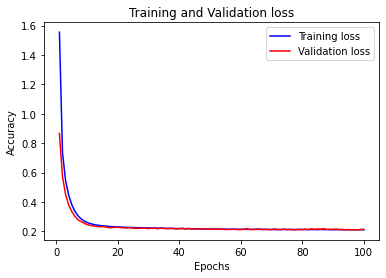

In [125]:
from matplotlib import pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [126]:
y_pred = model.predict_classes(X_test)

score,accuracy = model.evaluate(X_test, y_test,verbose=1)

print(score)
print(accuracy)

loss_metrics = model.evaluate(X_test, y_test,verbose=1)

print("Loss Metrics")
print(loss_metrics)

51/51 [==============================] - 0s 472us/step - loss: 0.1895 - accuracy: 0.9529
0.18946172297000885
0.9529120326042175
51/51 [==============================] - 0s 489us/step - loss: 0.1895 - accuracy: 0.9529
Loss Metrics
[0.18946172297000885, 0.9529120326042175]


In [127]:
y_score = model.predict(X_test)

In [128]:
from sklearn.metrics import classification_report, confusion_matrix
print('====Confusion Matrix=====')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('====Classification Report====')
print('\n')
print(classification_report(y_test,y_pred))

====Confusion Matrix=====


[[189   0  20   0   7]
 [  2   0   5   0   8]
 [ 19   0 400   0   0]
 [  0   0   0 409   0]
 [ 10   0   5   0 540]]


====Classification Report====


              precision    recall  f1-score   support

           0       0.86      0.88      0.87       216
           1       0.00      0.00      0.00        15
           2       0.93      0.95      0.94       419
           3       1.00      1.00      1.00       409
           4       0.97      0.97      0.97       555

    accuracy                           0.95      1614
   macro avg       0.75      0.76      0.76      1614
weighted avg       0.94      0.95      0.95      1614



C:\Users\Satya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [129]:
y_pred = model.predict_classes(X_train)

In [130]:
from sklearn.metrics import classification_report, confusion_matrix
print('====Confusion Matrix=====')
print('\n')
print(confusion_matrix(y_train,y_pred))
print('\n')
print('====Classification Report====')
print('\n')
print(classification_report(y_train,y_pred))

====Confusion Matrix=====


[[ 732    0   74    0   38]
 [   7    0   35    0   41]
 [  91    0 1612    1    9]
 [   0    0    0 1676    0]
 [  37    0   18    0 2083]]


====Classification Report====


              precision    recall  f1-score   support

           0       0.84      0.87      0.86       844
           1       0.00      0.00      0.00        83
           2       0.93      0.94      0.93      1713
           3       1.00      1.00      1.00      1676
           4       0.96      0.97      0.97      2138

    accuracy                           0.95      6454
   macro avg       0.75      0.76      0.75      6454
weighted avg       0.93      0.95      0.94      6454



C:\Users\Satya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [131]:
feature1 = df[["Weight","BW_Predition_100","Log_Reg Prediction","DTC Prediction"]]

In [132]:
X=feature1

#y=np.ravel(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)

In [133]:
model = Sequential()

model.add(Dense(6, activation='relu', input_shape=(4,)))

model.add(Dense(6, activation='relu'))

model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#es = EarlyStopping(monitor=['val_loss','accuracy'], mode=['min','max'], verbose=1, patience=200)
#mc = ModelCheckpoint('best_model_color_ensemble.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
import time
start = time.perf_counter()                   
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=None, verbose=1)
elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)
#plot_model(model, to_file='ensemble.png')

Epoch 1/100
162/162 [==============================] - 0s 1ms/step - loss: 1.3404 - accuracy: 0.4399 - val_loss: 0.9880 - val_accuracy: 0.6871
Epoch 2/100
162/162 [==============================] - 0s 739us/step - loss: 0.8538 - accuracy: 0.6944 - val_loss: 0.6655 - val_accuracy: 0.7219
Epoch 3/100
162/162 [==============================] - 0s 850us/step - loss: 0.5767 - accuracy: 0.7687 - val_loss: 0.4690 - val_accuracy: 0.9442
Epoch 4/100
162/162 [==============================] - 0s 887us/step - loss: 0.4628 - accuracy: 0.9142 - val_loss: 0.4060 - val_accuracy: 0.9520
Epoch 5/100
162/162 [==============================] - 0s 806us/step - loss: 0.4186 - accuracy: 0.9359 - val_loss: 0.3751 - val_accuracy: 0.9535
Epoch 6/100
162/162 [==============================] - 0s 868us/step - loss: 0.3908 - accuracy: 0.9398 - val_loss: 0.3579 - val_accuracy: 0.9566
Epoch 7/100
162/162 [==============================] - 0s 788us/step - loss: 0.3697 - accuracy: 0.9463 - val_loss: 0.3380 - val_accu

162/162 [==============================] - 0s 760us/step - loss: 0.2318 - accuracy: 0.9587 - val_loss: 0.2269 - val_accuracy: 0.9636
Epoch 58/100
162/162 [==============================] - 0s 762us/step - loss: 0.2317 - accuracy: 0.9586 - val_loss: 0.2249 - val_accuracy: 0.9636
Epoch 59/100
162/162 [==============================] - 0s 721us/step - loss: 0.2306 - accuracy: 0.9587 - val_loss: 0.2283 - val_accuracy: 0.9636
Epoch 60/100
162/162 [==============================] - 0s 721us/step - loss: 0.2314 - accuracy: 0.9587 - val_loss: 0.2247 - val_accuracy: 0.9636
Epoch 61/100
162/162 [==============================] - 0s 710us/step - loss: 0.2301 - accuracy: 0.9586 - val_loss: 0.2265 - val_accuracy: 0.9636
Epoch 62/100
162/162 [==============================] - 0s 714us/step - loss: 0.2299 - accuracy: 0.9587 - val_loss: 0.2262 - val_accuracy: 0.9636
Epoch 63/100
162/162 [==============================] - 0s 745us/step - loss: 0.2292 - accuracy: 0.9587 - val_loss: 0.2241 - val_accuracy

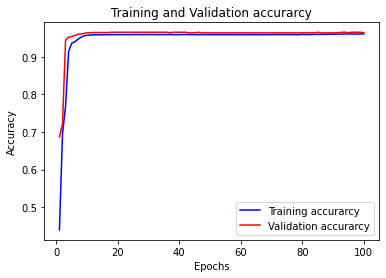

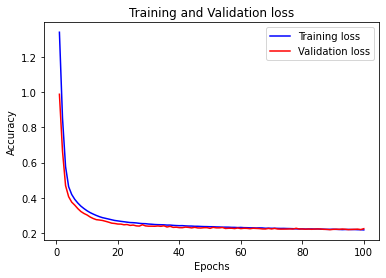

In [134]:
from matplotlib import pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [135]:
y_pred = model.predict_classes(X_test)

score,accuracy = model.evaluate(X_test, y_test,verbose=1)

print(score)
print(accuracy)

loss_metrics = model.evaluate(X_test, y_test,verbose=1)

print("Loss Metrics")
print(loss_metrics)

51/51 [==============================] - 0s 663us/step - loss: 0.2083 - accuracy: 0.9628
0.20833703875541687
0.9628252983093262
51/51 [==============================] - 0s 489us/step - loss: 0.2083 - accuracy: 0.9628
Loss Metrics
[0.20833703875541687, 0.9628252983093262]


In [136]:
y_score = model.predict(X_test)

In [137]:
from sklearn.metrics import classification_report, confusion_matrix
print('====Confusion Matrix=====')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('====Classification Report====')
print('\n')
print(classification_report(y_test,y_pred))

====Confusion Matrix=====


[[202   0  12   0   2]
 [  8   1   3   0   3]
 [ 16   0 400   0   3]
 [  0   0   1 408   0]
 [  8   0   4   0 543]]


====Classification Report====


              precision    recall  f1-score   support

           0       0.86      0.94      0.90       216
           1       1.00      0.07      0.12        15
           2       0.95      0.95      0.95       419
           3       1.00      1.00      1.00       409
           4       0.99      0.98      0.98       555

    accuracy                           0.96      1614
   macro avg       0.96      0.79      0.79      1614
weighted avg       0.96      0.96      0.96      1614



In [138]:
y_pred = model.predict_classes(X_train)

In [139]:
from sklearn.metrics import classification_report, confusion_matrix
print('====Confusion Matrix=====')
print('\n')
print(confusion_matrix(y_train,y_pred))
print('\n')
print('====Classification Report====')
print('\n')
print(classification_report(y_train,y_pred))

====Confusion Matrix=====


[[ 782    0   43    0   19]
 [  28    6   25    0   24]
 [  58    0 1646    2    7]
 [   0    0    0 1676    0]
 [  25    2   20    0 2091]]


====Classification Report====


              precision    recall  f1-score   support

           0       0.88      0.93      0.90       844
           1       0.75      0.07      0.13        83
           2       0.95      0.96      0.96      1713
           3       1.00      1.00      1.00      1676
           4       0.98      0.98      0.98      2138

    accuracy                           0.96      6454
   macro avg       0.91      0.79      0.79      6454
weighted avg       0.96      0.96      0.96      6454



In [140]:
feature1 = df[["Weight","BW_Predition_50","Log_Reg Prediction","DTC Prediction"]]

In [141]:
X=feature1

#y=np.ravel(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)

In [142]:
model = Sequential()

model.add(Dense(6, activation='relu', input_shape=(4,)))

model.add(Dense(6, activation='relu'))

model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#es = EarlyStopping(monitor=['val_loss','accuracy'], mode=['min','max'], verbose=1, patience=200)
#mc = ModelCheckpoint('best_model_color_ensemble.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
import time
start = time.perf_counter()                   
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=None, verbose=1)
elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)
#plot_model(model, to_file='ensemble.png')

Epoch 1/100
162/162 [==============================] - 0s 2ms/step - loss: 1.7932 - accuracy: 0.4122 - val_loss: 1.2556 - val_accuracy: 0.6809
Epoch 2/100
162/162 [==============================] - 0s 825us/step - loss: 1.0813 - accuracy: 0.7226 - val_loss: 0.9141 - val_accuracy: 0.7885
Epoch 3/100
162/162 [==============================] - 0s 763us/step - loss: 0.8329 - accuracy: 0.8158 - val_loss: 0.7254 - val_accuracy: 0.8552
Epoch 4/100
162/162 [==============================] - 0s 806us/step - loss: 0.6765 - accuracy: 0.8669 - val_loss: 0.6095 - val_accuracy: 0.8861
Epoch 5/100
162/162 [==============================] - 0s 813us/step - loss: 0.5661 - accuracy: 0.9012 - val_loss: 0.5082 - val_accuracy: 0.9194
Epoch 6/100
162/162 [==============================] - 0s 800us/step - loss: 0.4889 - accuracy: 0.9289 - val_loss: 0.4459 - val_accuracy: 0.9411
Epoch 7/100
162/162 [==============================] - 0s 803us/step - loss: 0.4328 - accuracy: 0.9405 - val_loss: 0.3993 - val_accu

162/162 [==============================] - 0s 728us/step - loss: 0.2154 - accuracy: 0.9465 - val_loss: 0.2134 - val_accuracy: 0.9473
Epoch 58/100
162/162 [==============================] - 0s 724us/step - loss: 0.2154 - accuracy: 0.9473 - val_loss: 0.2142 - val_accuracy: 0.9473
Epoch 59/100
162/162 [==============================] - 0s 727us/step - loss: 0.2144 - accuracy: 0.9471 - val_loss: 0.2202 - val_accuracy: 0.9473
Epoch 60/100
162/162 [==============================] - 0s 749us/step - loss: 0.2145 - accuracy: 0.9471 - val_loss: 0.2166 - val_accuracy: 0.9473
Epoch 61/100
162/162 [==============================] - 0s 698us/step - loss: 0.2136 - accuracy: 0.9475 - val_loss: 0.2170 - val_accuracy: 0.9473
Epoch 62/100
162/162 [==============================] - 0s 718us/step - loss: 0.2140 - accuracy: 0.9475 - val_loss: 0.2158 - val_accuracy: 0.9473
Epoch 63/100
162/162 [==============================] - 0s 702us/step - loss: 0.2129 - accuracy: 0.9475 - val_loss: 0.2129 - val_accuracy

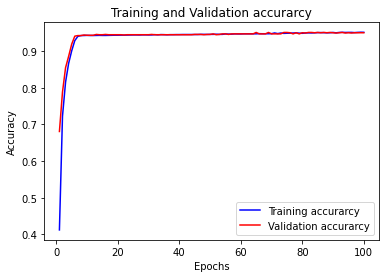

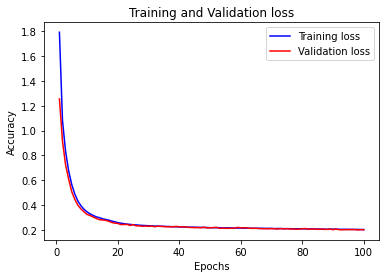

In [143]:
from matplotlib import pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [144]:
y_pred = model.predict_classes(X_test)

score,accuracy = model.evaluate(X_test, y_test,verbose=1)

print(score)
print(accuracy)

loss_metrics = model.evaluate(X_test, y_test,verbose=1)

print("Loss Metrics")
print(loss_metrics)

51/51 [==============================] - 0s 446us/step - loss: 0.2016 - accuracy: 0.9511
0.20159874856472015
0.951053261756897
51/51 [==============================] - 0s 470us/step - loss: 0.2016 - accuracy: 0.9511
Loss Metrics
[0.20159874856472015, 0.951053261756897]


In [145]:
y_score = model.predict(X_test)

In [146]:
from sklearn.metrics import classification_report, confusion_matrix
print('====Confusion Matrix=====')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('====Classification Report====')
print('\n')
print(classification_report(y_test,y_pred))

====Confusion Matrix=====


[[187   0  17   0  12]
 [  4   5   0   0   6]
 [ 22   0 396   0   1]
 [  0   0   0 409   0]
 [ 11   1   5   0 538]]


====Classification Report====


              precision    recall  f1-score   support

           0       0.83      0.87      0.85       216
           1       0.83      0.33      0.48        15
           2       0.95      0.95      0.95       419
           3       1.00      1.00      1.00       409
           4       0.97      0.97      0.97       555

    accuracy                           0.95      1614
   macro avg       0.92      0.82      0.85      1614
weighted avg       0.95      0.95      0.95      1614



In [147]:
y_pred = model.predict_classes(X_train)

In [148]:
from sklearn.metrics import classification_report, confusion_matrix
print('====Confusion Matrix=====')
print('\n')
print(confusion_matrix(y_train,y_pred))
print('\n')
print('====Classification Report====')
print('\n')
print(classification_report(y_train,y_pred))

====Confusion Matrix=====


[[ 727    0   70    0   47]
 [  29   26    0    0   28]
 [  77    0 1620    1   15]
 [   0    0    0 1676    0]
 [  37    1   18    0 2082]]


====Classification Report====


              precision    recall  f1-score   support

           0       0.84      0.86      0.85       844
           1       0.96      0.31      0.47        83
           2       0.95      0.95      0.95      1713
           3       1.00      1.00      1.00      1676
           4       0.96      0.97      0.97      2138

    accuracy                           0.95      6454
   macro avg       0.94      0.82      0.85      6454
weighted avg       0.95      0.95      0.95      6454



In [149]:
feature1 = df[["Weight","BW_Predition_25","Log_Reg Prediction","DTC Prediction"]]

In [150]:
X=feature1

#y=np.ravel(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)

In [151]:
model = Sequential()

model.add(Dense(6, activation='relu', input_shape=(4,)))

model.add(Dense(6, activation='relu'))

model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#es = EarlyStopping(monitor=['val_loss','accuracy'], mode=['min','max'], verbose=1, patience=200)
#mc = ModelCheckpoint('best_model_color_ensemble.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
import time
start = time.perf_counter()                   
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=None, verbose=1)
elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)
#plot_model(model, to_file='ensemble.png')

Epoch 1/100
162/162 [==============================] - 0s 1ms/step - loss: 1.3057 - accuracy: 0.4025 - val_loss: 1.0662 - val_accuracy: 0.5523
Epoch 2/100
162/162 [==============================] - 0s 693us/step - loss: 1.0178 - accuracy: 0.5977 - val_loss: 0.9358 - val_accuracy: 0.6414
Epoch 3/100
162/162 [==============================] - 0s 757us/step - loss: 0.9239 - accuracy: 0.6405 - val_loss: 0.8611 - val_accuracy: 0.6933
Epoch 4/100
162/162 [==============================] - 0s 712us/step - loss: 0.8634 - accuracy: 0.6825 - val_loss: 0.8061 - val_accuracy: 0.7204
Epoch 5/100
162/162 [==============================] - 0s 690us/step - loss: 0.8163 - accuracy: 0.7188 - val_loss: 0.7616 - val_accuracy: 0.7204
Epoch 6/100
162/162 [==============================] - 0s 736us/step - loss: 0.7774 - accuracy: 0.7372 - val_loss: 0.7250 - val_accuracy: 0.7614
Epoch 7/100
162/162 [==============================] - 0s 772us/step - loss: 0.7429 - accuracy: 0.7567 - val_loss: 0.6905 - val_accu

162/162 [==============================] - 0s 718us/step - loss: 0.2822 - accuracy: 0.9297 - val_loss: 0.2568 - val_accuracy: 0.9326
Epoch 58/100
162/162 [==============================] - 0s 738us/step - loss: 0.2814 - accuracy: 0.9297 - val_loss: 0.2594 - val_accuracy: 0.9334
Epoch 59/100
162/162 [==============================] - 0s 738us/step - loss: 0.2812 - accuracy: 0.9297 - val_loss: 0.2561 - val_accuracy: 0.9326
Epoch 60/100
162/162 [==============================] - 0s 721us/step - loss: 0.2804 - accuracy: 0.9297 - val_loss: 0.2548 - val_accuracy: 0.9326
Epoch 61/100
162/162 [==============================] - 0s 727us/step - loss: 0.2802 - accuracy: 0.9297 - val_loss: 0.2549 - val_accuracy: 0.9326
Epoch 62/100
162/162 [==============================] - 0s 758us/step - loss: 0.2798 - accuracy: 0.9297 - val_loss: 0.2572 - val_accuracy: 0.9326
Epoch 63/100
162/162 [==============================] - 0s 762us/step - loss: 0.2797 - accuracy: 0.9297 - val_loss: 0.2610 - val_accuracy

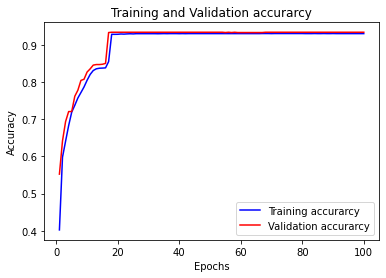

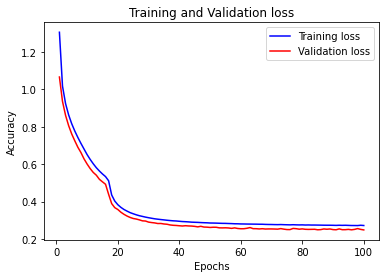

In [152]:
from matplotlib import pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [153]:
y_pred = model.predict_classes(X_test)

score,accuracy = model.evaluate(X_test, y_test,verbose=1)

print(score)
print(accuracy)

loss_metrics = model.evaluate(X_test, y_test,verbose=1)

print("Loss Metrics")
print(loss_metrics)

51/51 [==============================] - 0s 489us/step - loss: 0.2596 - accuracy: 0.9306
0.25963959097862244
0.9306071996688843
51/51 [==============================] - 0s 450us/step - loss: 0.2596 - accuracy: 0.9306
Loss Metrics
[0.25963959097862244, 0.9306071996688843]


In [154]:
y_score = model.predict(X_test)

In [155]:
from sklearn.metrics import classification_report, confusion_matrix
print('====Confusion Matrix=====')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('====Classification Report====')
print('\n')
print(classification_report(y_test,y_pred))

====Confusion Matrix=====


[[172   0  35   0   9]
 [  4   0   1   0  10]
 [ 26   0 393   0   0]
 [  0   0   0 409   0]
 [ 14   0  13   0 528]]


====Classification Report====


              precision    recall  f1-score   support

           0       0.80      0.80      0.80       216
           1       0.00      0.00      0.00        15
           2       0.89      0.94      0.91       419
           3       1.00      1.00      1.00       409
           4       0.97      0.95      0.96       555

    accuracy                           0.93      1614
   macro avg       0.73      0.74      0.73      1614
weighted avg       0.92      0.93      0.93      1614



C:\Users\Satya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [156]:
y_pred = model.predict_classes(X_train)

In [157]:
from sklearn.metrics import classification_report, confusion_matrix
print('====Confusion Matrix=====')
print('\n')
print(confusion_matrix(y_train,y_pred))
print('\n')
print('====Classification Report====')
print('\n')
print(classification_report(y_train,y_pred))

====Confusion Matrix=====


[[ 683    0  119    0   42]
 [  15    0   11    0   57]
 [ 115    0 1586    0   12]
 [   1    0    0 1672    3]
 [  54    0   20    0 2064]]


====Classification Report====


              precision    recall  f1-score   support

           0       0.79      0.81      0.80       844
           1       0.00      0.00      0.00        83
           2       0.91      0.93      0.92      1713
           3       1.00      1.00      1.00      1676
           4       0.95      0.97      0.96      2138

    accuracy                           0.93      6454
   macro avg       0.73      0.74      0.73      6454
weighted avg       0.92      0.93      0.92      6454



C:\Users\Satya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
